# Query Vision Language Model

## Querying Qwen-VL

In [1]:
import nest_asyncio

nest_asyncio.apply()  # Run this first.

model_path = "Qwen/Qwen2.5-VL-3B-Instruct"
chat_template = "qwen2-vl"

<|im_start|>system
You are a helpful assistant.<|im_end|>
<|im_start|>user
What's shown here: <|vision_start|><|image_pad|><|vision_end|>?<|im_end|>
<|im_start|>assistant



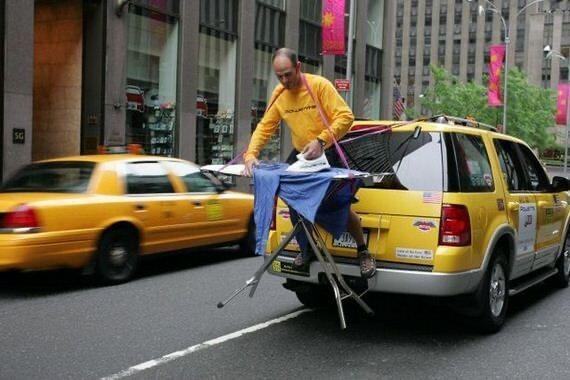

In [2]:
# Lets create a prompt.

from io import BytesIO
import requests
from PIL import Image

from sglang.srt.conversation import chat_templates

image = Image.open(
    BytesIO(
        requests.get(
            "https://github.com/sgl-project/sglang/blob/main/test/lang/example_image.png?raw=true"
        ).content
    )
)

conv = chat_templates[chat_template].copy()
conv.append_message(conv.roles[0], f"What's shown here: {conv.image_token}?")
conv.append_message(conv.roles[1], "")
conv.image_data = [image]

print(conv.get_prompt())
image

### Query via the offline Engine API

In [3]:
from sglang import Engine

llm = Engine(
    model_path=model_path, chat_template=chat_template, mem_fraction_static=0.8
)

W0815 19:38:28.051000 3742272 torch/utils/cpp_extension.py:2425] TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
W0815 19:38:28.051000 3742272 torch/utils/cpp_extension.py:2425] If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'] to specific architectures.


You have video processor config saved in `preprocessor.json` file which is deprecated. Video processor configs should be saved in their own `video_preprocessor.json` file. You can rename the file or load and save the processor back which renames it automatically. Loading from `preprocessor.json` will be removed in v5.0.


[2025-08-15 19:38:32] You have video processor config saved in `preprocessor.json` file which is deprecated. Video processor configs should be saved in their own `video_preprocessor.json` file. You can rename the file or load and save the processor back which renames it automatically. Loading from `preprocessor.json` will be removed in v5.0.


W0815 19:38:39.855000 3742975 torch/utils/cpp_extension.py:2425] TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
W0815 19:38:39.855000 3742975 torch/utils/cpp_extension.py:2425] If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'] to specific architectures.


You have video processor config saved in `preprocessor.json` file which is deprecated. Video processor configs should be saved in their own `video_preprocessor.json` file. You can rename the file or load and save the processor back which renames it automatically. Loading from `preprocessor.json` will be removed in v5.0.
[2025-08-15 19:38:41] You have video processor config saved in `preprocessor.json` file which is deprecated. Video processor configs should be saved in their own `video_preprocessor.json` file. You can rename the file or load and save the processor back which renames it automatically. Loading from `preprocessor.json` will be removed in v5.0.


[Gloo] Rank 0 is connected to 0 peer ranks. Expected number of connected peer ranks is : 0
[Gloo] Rank 0 is connected to 0 peer ranks. Expected number of connected peer ranks is : 0
[Gloo] Rank 0 is connected to 0 peer ranks. Expected number of connected peer ranks is : 0
[Gloo] Rank 0 is connected to 0 peer ranks. Expected number of connected peer ranks is : 0
[Gloo] Rank 0 is connected to 0 peer ranks. Expected number of connected peer ranks is : 0
[Gloo] Rank 0 is connected to 0 peer ranks. Expected number of connected peer ranks is : 0


Loading safetensors checkpoint shards:   0% Completed | 0/2 [00:00<?, ?it/s]


Loading safetensors checkpoint shards:  50% Completed | 1/2 [00:00<00:00,  1.36it/s]


Loading safetensors checkpoint shards: 100% Completed | 2/2 [00:01<00:00,  1.42it/s]
Loading safetensors checkpoint shards: 100% Completed | 2/2 [00:01<00:00,  1.41it/s]



Capturing batches (bs=160 avail_mem=12.86 GB):   0%|          | 0/23 [00:00<?, ?it/s]

Capturing batches (bs=144 avail_mem=12.70 GB):   9%|▊         | 2/23 [00:00<00:07,  2.66it/s]

Capturing batches (bs=136 avail_mem=12.67 GB):  13%|█▎        | 3/23 [00:00<00:05,  3.79it/s]

Capturing batches (bs=128 avail_mem=12.65 GB):  17%|█▋        | 4/23 [00:01<00:05,  3.54it/s]

Capturing batches (bs=112 avail_mem=11.57 GB):  26%|██▌       | 6/23 [00:01<00:04,  3.69it/s]

Capturing batches (bs=96 avail_mem=11.12 GB):  35%|███▍      | 8/23 [00:02<00:03,  4.34it/s] 

Capturing batches (bs=88 avail_mem=11.09 GB):  39%|███▉      | 9/23 [00:02<00:03,  4.28it/s]

Capturing batches (bs=72 avail_mem=11.04 GB):  48%|████▊     | 11/23 [00:02<00:02,  4.75it/s]

Capturing batches (bs=64 avail_mem=11.02 GB):  52%|█████▏    | 12/23 [00:03<00:02,  5.03it/s]

Capturing batches (bs=56 avail_mem=10.97 GB):  57%|█████▋    | 13/23 [00:03<00:02,  4.45it/s]

Capturing batches (bs=48 avail_mem=10.92 GB):  61%|██████    | 14/23 [00:03<00:02,  4.13it/s]

Capturing batches (bs=40 avail_mem=10.87 GB):  65%|██████▌   | 15/23 [00:03<00:02,  3.92it/s]

Capturing batches (bs=32 avail_mem=10.84 GB):  70%|██████▉   | 16/23 [00:04<00:01,  3.85it/s]

Capturing batches (bs=24 avail_mem=10.81 GB):  74%|███████▍  | 17/23 [00:04<00:01,  3.07it/s]

Capturing batches (bs=16 avail_mem=10.80 GB):  78%|███████▊  | 18/23 [00:05<00:02,  2.43it/s]

Capturing batches (bs=8 avail_mem=10.77 GB):  83%|████████▎ | 19/23 [00:05<00:01,  2.85it/s] 

Capturing batches (bs=2 avail_mem=10.60 GB):  91%|█████████▏| 21/23 [00:05<00:00,  3.60it/s]

Capturing batches (bs=1 avail_mem=10.59 GB): 100%|██████████| 23/23 [00:06<00:00,  3.71it/s]


In [4]:
out = llm.generate(prompt=conv.get_prompt(), image_data=[image])
print(out["text"])

This image shows a street scene in New York City, as indicated by the iconic yellow taxis. In the foreground, a man is ironing clothes, which is an unusual and humorous sight. He appears to be wearing yellow shorts and a yellow shirt. The man is using a clothes rack to hang the ironed items on the back of a yellow taxi, creating a makeshift drying station. This scene captures a playful and unexpected moment on the streets of New York.


### Query via the offline Engine API, but send precomputed embeddings

In [5]:
# Compute the image embeddings using Huggingface.

from transformers import AutoProcessor
from transformers import Qwen2_5_VLForConditionalGeneration

processor = AutoProcessor.from_pretrained(model_path, use_fast=True)
vision = (
    Qwen2_5_VLForConditionalGeneration.from_pretrained(model_path).eval().visual.cuda()
)

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [6]:
processed_prompt = processor(
    images=[image], text=conv.get_prompt(), return_tensors="pt"
)
input_ids = processed_prompt["input_ids"][0].detach().cpu().tolist()
precomputed_embeddings = vision(
    processed_prompt["pixel_values"].cuda(), processed_prompt["image_grid_thw"].cuda()
)

mm_item = dict(
    modality="IMAGE",
    image_grid_thw=processed_prompt["image_grid_thw"],
    precomputed_embeddings=precomputed_embeddings,
)
out = llm.generate(input_ids=input_ids, image_data=[mm_item])
print(out["text"])

The image shows a yellow taxi cab stopped on the street. A person is in the back of the cab, holding a horizontal bar with clothespins and a piece of cloth. The background features buildings, including a store with large windows, and some flags on flagpoles. The setting appears to be an urban area.


## Querying Llama 4 (Vision)

In [7]:
import nest_asyncio

nest_asyncio.apply()  # Run this first.

model_path = "meta-llama/Llama-4-Scout-17B-16E-Instruct"
chat_template = "llama-4"

<|header_start|>user<|header_end|>

What's shown here: <|image|>?<|eot|><|header_start|>assistant<|header_end|>


Image size: (570, 380)


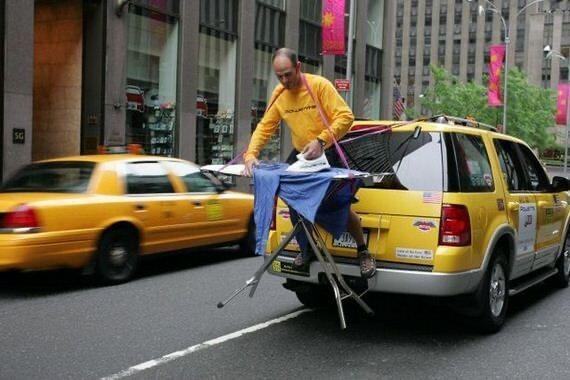

In [8]:
# Lets create a prompt.

from io import BytesIO
import requests
from PIL import Image

from sglang.srt.conversation import chat_templates

image = Image.open(
    BytesIO(
        requests.get(
            "https://github.com/sgl-project/sglang/blob/main/test/lang/example_image.png?raw=true"
        ).content
    )
)

conv = chat_templates[chat_template].copy()
conv.append_message(conv.roles[0], f"What's shown here: {conv.image_token}?")
conv.append_message(conv.roles[1], "")
conv.image_data = [image]

print(conv.get_prompt())
print(f"Image size: {image.size}")

image

### Query via the offline Engine API

In [9]:
from sglang.test.test_utils import is_in_ci

if not is_in_ci():
    from sglang import Engine

    llm = Engine(
        model_path=model_path,
        trust_remote_code=True,
        enable_multimodal=True,
        mem_fraction_static=0.8,
        tp_size=4,
        attention_backend="fa3",
        context_length=65536,
    )

In [10]:
if not is_in_ci():
    out = llm.generate(prompt=conv.get_prompt(), image_data=[image])
    print(out["text"])

### Query via the offline Engine API, but send precomputed embeddings

In [11]:
if not is_in_ci():
    # Compute the image embeddings using Huggingface.

    from transformers import AutoProcessor
    from transformers import Llama4ForConditionalGeneration

    processor = AutoProcessor.from_pretrained(model_path, use_fast=True)
    model = Llama4ForConditionalGeneration.from_pretrained(
        model_path, torch_dtype="auto"
    ).eval()
    vision = model.vision_model.cuda()
    multi_modal_projector = model.multi_modal_projector.cuda()

In [12]:
if not is_in_ci():
    processed_prompt = processor(
        images=[image], text=conv.get_prompt(), return_tensors="pt"
    )
    print(f'{processed_prompt["pixel_values"].shape=}')
    input_ids = processed_prompt["input_ids"][0].detach().cpu().tolist()

    image_outputs = vision(
        processed_prompt["pixel_values"].to("cuda"), output_hidden_states=False
    )
    image_features = image_outputs.last_hidden_state
    vision_flat = image_features.view(-1, image_features.size(-1))
    precomputed_embeddings = multi_modal_projector(vision_flat)

    mm_item = dict(modality="IMAGE", precomputed_embeddings=precomputed_embeddings)
    out = llm.generate(input_ids=input_ids, image_data=[mm_item])
    print(out["text"])